# First Practical Work

## Data Science and Engineering

### DESIGN OF AN IMAGE FILTER FUNCTION, PARALLELIZABLE AND SCALABLE

**Full name: FRANCISCO JOSÉ LANDA ORTEGA & TERESA GENER LÓPEZ**
    
**NIA : 100483174 & 100472787**

In [1]:
import numpy as np
import multiprocessing as mp
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cProfile
import ctypes
import functions
from multiprocessing.sharedctypes import Value, Array, RawArray

In [2]:
F_IMAGE1="chess.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD
F_IMAGE2="digits.jpg" #<DEFINE HERE WHICH IMAGE YOU WANTS TO LOAD

In [3]:
image1= np.array(Image.open(F_IMAGE1))
image2= np.array(Image.open(F_IMAGE2))

In [4]:
filter1=np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])
filter2=np.array([0.5, 0 , -0.5])
filter3=np.array([[0.5],[0],[-0.5]])

filter4=np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
filter5=np.array([
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.01330373,0.11098164,0.22508352,0.11098164,0.01330373],
    [0.00655965,0.05472157,0.11098164,0.05472157,0.00655965],
    [0.00078633,0.00655965,0.01330373,0.00655965,0.00078633]
])

In [5]:
NUMPROCESS=8

We prepare the size of our working space, we will use 3. One to try requirement 1) and the other 2 for the requirement 2)

In [6]:
filtered_image1_VECTOR = Array(ctypes.c_byte, image1.shape[0] * image1.shape[1] * image1.shape[2])
filtered_image2_VECTOR = Array(ctypes.c_byte, image1.shape[0] * image1.shape[1] * image1.shape[2])
filtered_image3_VECTOR = Array(ctypes.c_byte, image2.shape[0] * image2.shape[1] * image2.shape[2])

In [7]:
def tonumpyarray(mp_arr):
    #mp_array is a shared memory array with lock
    return np.frombuffer(mp_arr.get_obj(),dtype=np.uint8)


After this cell you have to use the preloaded image defined in the F_IMAGE variable, select two of the 5 filter predefined, and using the NUMPROCESS processors, apply the filters to the image and check results.

* The first filter is impulse response filter (the image output must be equals to the original one).
* The second filter is an edge filter, first order in x axis,  
* The third filter is an edge filter, first order in y axis,
* the fourth filter is an edge filter, second order, bi-directional
* the fifth filter is a blur gausian filter.

We call our function image_filter with the given parameters

In [8]:
functions.image_filter(image2, filter5, 8, filtered_image3_VECTOR)

Image copied to shared memory.
Image processing completed.


We now call the parallel filters execution with its own parameters

In [9]:
functions.filters_execution(image1,filter4,filter3, 8, filtered_image1_VECTOR,filtered_image2_VECTOR)

# Visualization
In this last cells we take the filtered images stored in the multiprocessing.Vector variables filtered_image1_VECTOR and filtered_image2_VECTOR, converts to numpy array, with the same shape of the orginal images, and show the results.

We prepare the arrays for the plots

In [10]:
filtered_image1=tonumpyarray(filtered_image1_VECTOR).reshape(image1.shape)
filtered_image2=tonumpyarray(filtered_image2_VECTOR).reshape(image1.shape)
filtered_image3=tonumpyarray(filtered_image3_VECTOR).reshape(image2.shape)

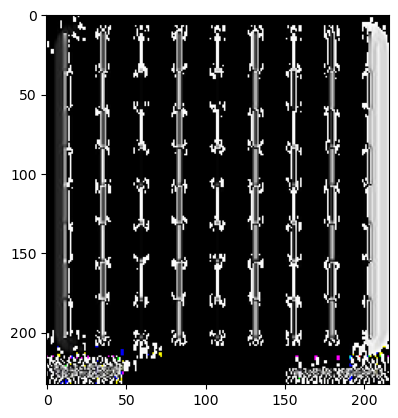

In [11]:
plt.figure()
plt.imshow(filtered_image1)

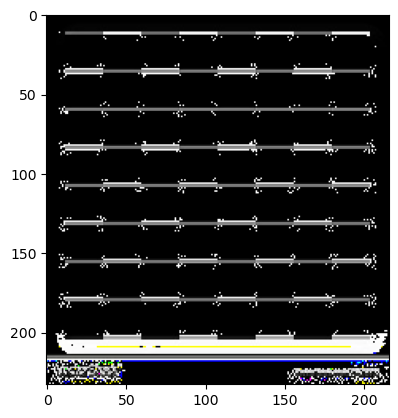

In [12]:
plt.figure()
plt.imshow(filtered_image2)

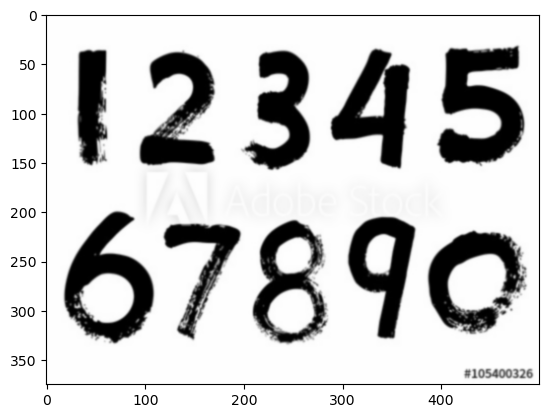

In [13]:
plt.figure()
plt.imshow(filtered_image3)

## Conclusions
Here I will highlight some important aspects when developing and testing this Practical Work.

### Functions file
To start with, after discussing on how to develop the functions, we started trying to join all the pieces of code into a single or a couple of functions but found it impossible. Thus, we decided to implement some auxiliar functions to help with data preparation or execution needs. The main thread will be carried out by a class, as it will be much faster and easier to acces to all the needed data, safer between processes and we were very confident in our previous work with the class method.

Also we debugged the code in order to avoid unnecesary code lines or to extract some common features into functions.

### Execution Improvements
After getting rid of as many `if` statements as we could, that is why we use the max function in the filter function. Also after some thinking we tried to explore even more ways of improving the algorithm but end up leaving the code as we have it right now.

We faced some issues when dealing with a 1 row 1 column filters, as it broke a litle bit our algorithm but, after some hard-thinking, we were able to fix it with an `if`. We tried to put the if inside, outside the loop and to even create a sort of switch to improve efficiency but ended up leaving the if inside the inner for loop. 

In addition some irrelevant calculations were taken out from the loops in order to avoid redundant memory accesses and calculations.

We feel very confident with the code developed.